# Preparing the environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [2]:
df=pd.read_csv("Advertising.csv")

# Data Exploration

In [3]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Data Visualization

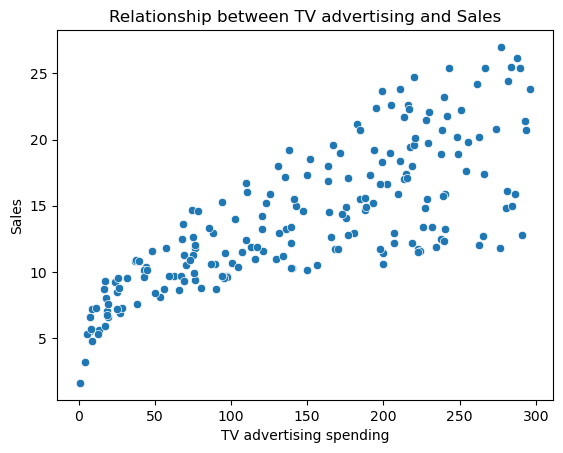

In [8]:
sns.scatterplot(data=df, x='TV',y='Sales')
plt.xlabel('TV advertising spending')
plt.ylabel('Sales')
plt.title('Relationship between TV advertising and Sales')
plt.show()

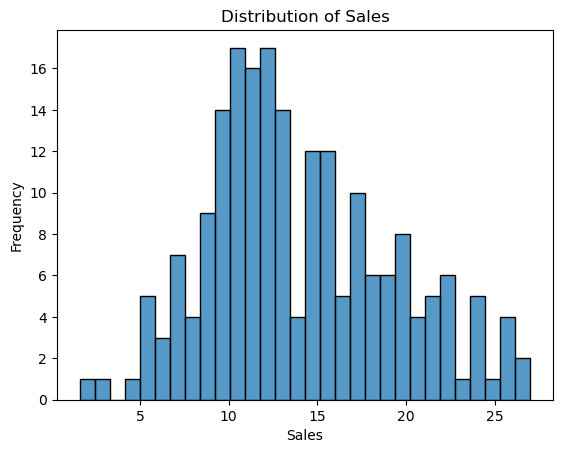

In [9]:
sns.histplot(df['Sales'], bins=30)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

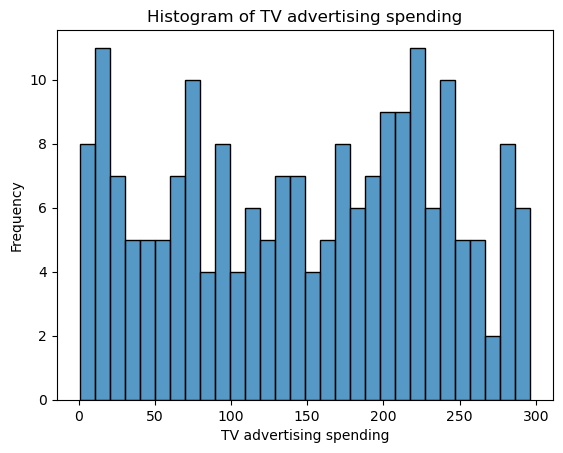

In [10]:
sns.histplot(df['TV'], bins=30)
plt.xlabel('TV advertising spending')
plt.ylabel('Frequency')
plt.title('Histogram of TV advertising spending')
plt.show()

C:\Users\jsoum\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


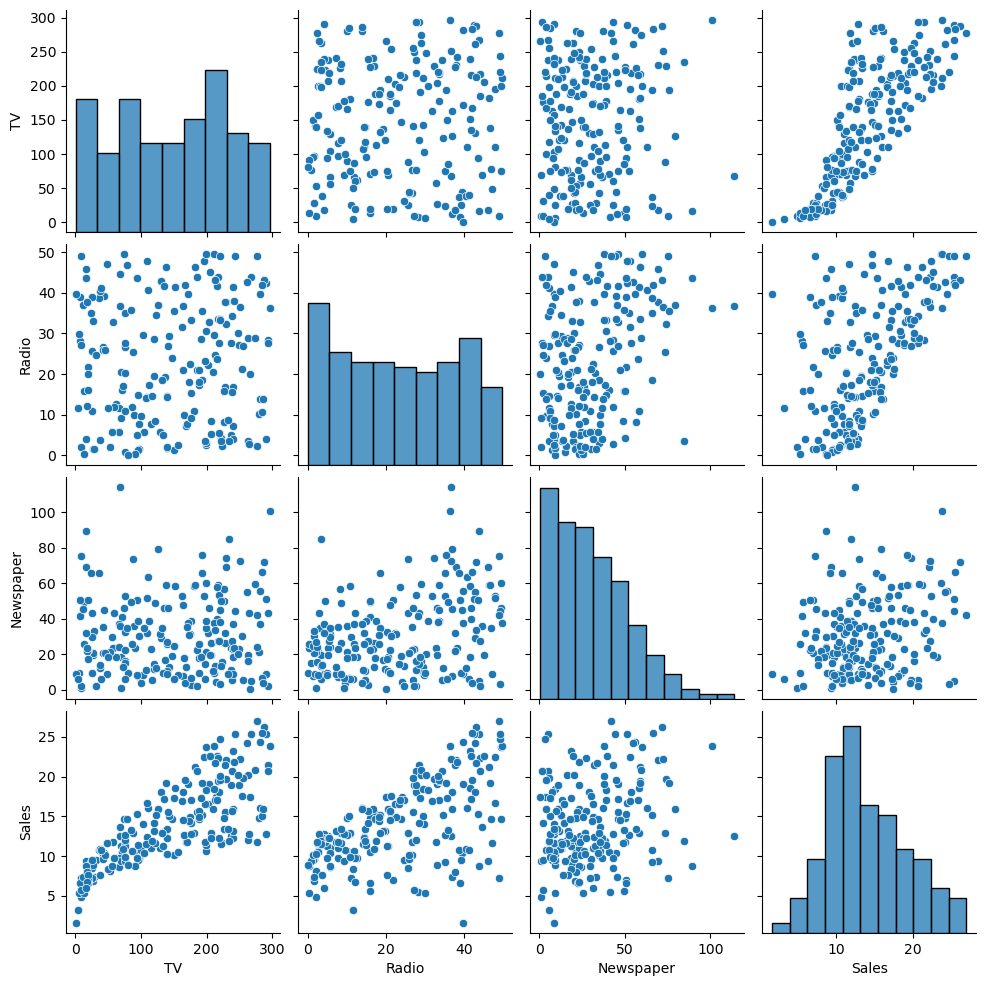

In [11]:
sns.pairplot(df)
plt.show()

# Model Building

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=df.drop('Sales',axis=1)
y=df['Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 2.88
R-squared: 0.89


# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 2.07
R-squared: 0.92


# Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
model_forest = RandomForestRegressor(random_state=42)
model_forest.fit(X_train, y_train)
y_pred = model_forest.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.50
R-squared: 0.98


# Support Vector Machine

In [20]:
from sklearn.svm import SVR
model_svm = SVR(kernel='linear')
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 3.19
R-squared: 0.88
